In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [135]:
df=pd.read_csv("/Users/ravina/Downloads/Social_Network_Ads.csv")

In [136]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [138]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [139]:
df=df.iloc[:,2:]

In [140]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [141]:
df.sample(10) #used to randomly select a specified number of rows from a DataFrame. 

,Age,EstimatedSalary,Purchased
365,59,29000,1
259,45,131000,1
226,36,126000,1
225,37,53000,0
274,57,26000,1
189,28,32000,0
228,40,72000,0
286,37,62000,0
273,39,106000,1
297,43,112000,1


# to appply standardization (or any transformation) first. devide the cdataset into train and test data


In [10]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.25,random_state=23)

In [22]:
X_train.shape,X_test.shape

((300, 2), (100, 2))

# Standardization

In [35]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [39]:
scaler.mean_

array([3.78166667e+01, 6.93266667e+04])

In [40]:
X_train_scaled  #it is in array form, first convert it into pandas dataframe

array([[ 0.39312392, -0.12803666],
       [-1.20443144,  0.52299721],
       [-0.64058837, -0.09844421],
       [-0.35866684,  1.26280842],
       [-1.39237913, -0.18722156],
       [ 1.89670543,  0.93729149],
       [-1.20443144,  0.61177455],
       [-0.07674531,  0.13829538],
       [ 1.80273158, -1.28214215],
       [ 1.14491467, -1.45969684],
       [-1.76827451,  0.46381231],
       [ 0.20517623, -0.36477625],
       [ 0.20517623, -0.2759989 ],
       [-0.17071915, -0.51273849],
       [ 0.29915007, -0.71988563],
       [-0.92250991, -1.10458746],
       [ 1.42683621,  0.37503496],
       [-1.86224835,  0.49340476],
       [ 0.95696698, -1.19336481],
       [-0.73456222, -0.21681401],
       [ 1.99067927,  0.40462741],
       [ 0.86299314, -1.3117346 ],
       [-1.48635297, -1.25254971],
       [ 2.08465312, -0.80866298],
       [-1.1104576 ,  0.31585007],
       [-1.01648375,  0.61177455],
       [-0.54661453, -1.51888174],
       [ 1.89670543, -0.92703277],
       [-0.82853606,

In [43]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [44]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,37.8,69326.7
std,10.7,33848.9
min,18.0,15000.0
25%,29.8,43000.0
50%,37.0,67000.0
75%,46.0,87000.0
max,60.0,150000.0


In [45]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,-0.1
75%,0.8,0.5
max,2.1,2.4


# Let's see how this standardization affect our data

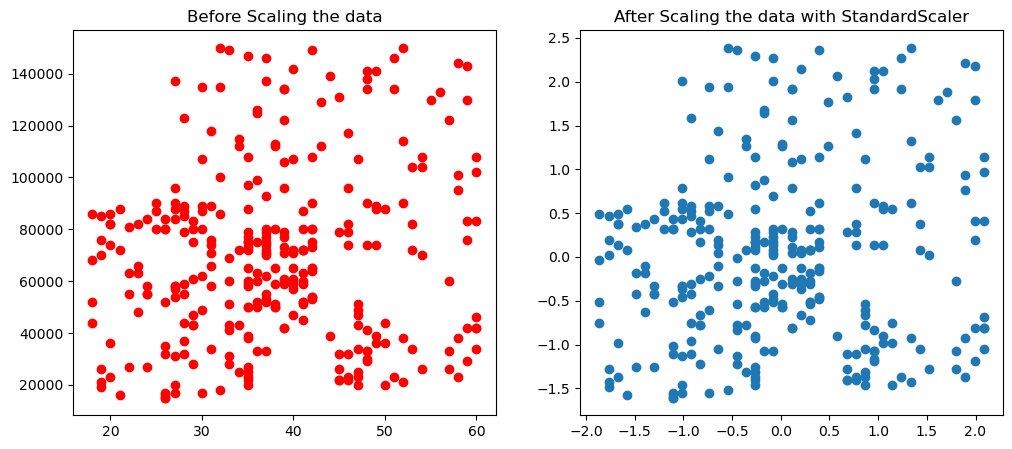

In [46]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'],color='red')
ax1.set_title('Before Scaling the data')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling the data with StandardScaler')

plt.show()




# Observation:
we can see that the data distributionb appears the same. only scale of the data is changed.

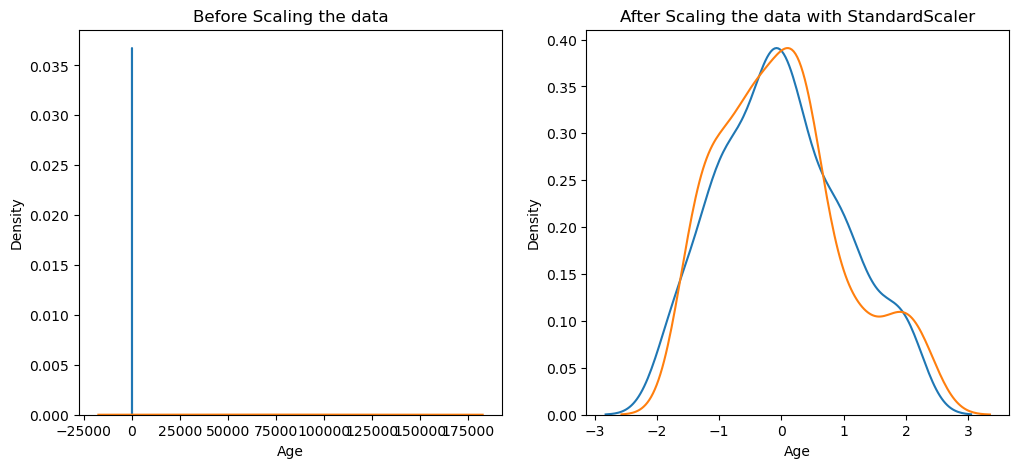

In [47]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title('Before Scaling the data')

sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title('After Scaling the data with StandardScaler')

plt.show()


# Let's see the distribution of the data using graph

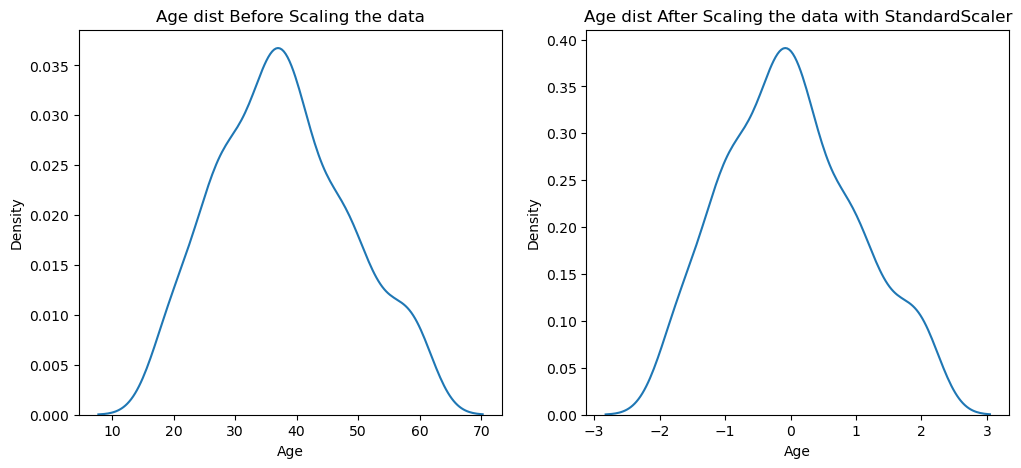

In [48]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['Age'],ax=ax1)
#sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title('Age dist Before Scaling the data')

sns.kdeplot(X_train_scaled['Age'],ax=ax2)
#sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title('Age dist After Scaling the data with StandardScaler')

plt.show()


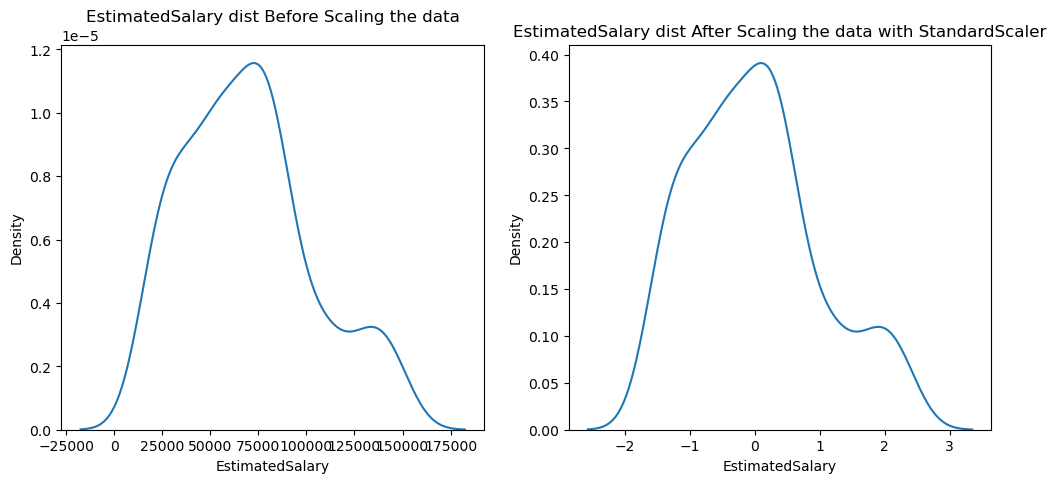

In [49]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title('EstimatedSalary dist Before Scaling the data')

#sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title('EstimatedSalary dist After Scaling the data with StandardScaler')

plt.show()

# Observation: 
distribution remains the same here after and before the transformation

# Let's see why scaling is important
apply ML algorithms on scaled and unscaled data and observe how the performance affected

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model=LogisticRegression()
model_on_scaled=LogisticRegression()


In [53]:
model.fit(X_train,y_train)
model_on_scaled.fit(X_train_scaled,y_train)


LogisticRegression()

In [54]:
y_pred=model.predict(X_test)
y_pred_scaled=model_on_scaled.predict(X_test_scaled)


In [55]:
from sklearn.metrics import accuracy_score, classification_report

In [56]:
print("Accuracy without scaling the data", accuracy_score(y_test,y_pred))
print("Accuracy after scaling the data", accuracy_score(y_test,y_pred_scaled))

Accuracy without scaling the data 0.65
Accuracy after scaling the data 0.83


In [60]:
print("classification report without scaling the data")
print(classification_report(y_test,y_pred))

classification report without scaling the data
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        65
           1       0.00      0.00      0.00        35

    accuracy                           0.65       100
   macro avg       0.33      0.50      0.39       100
weighted avg       0.42      0.65      0.51       100



/Users/ravina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ravina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ravina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
print("classification report after scaling the data")
print(classification_report(y_test,y_pred_scaled))

classification report after scaling the data
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        65
           1       0.85      0.63      0.72        35

    accuracy                           0.83       100
   macro avg       0.84      0.78      0.80       100
weighted avg       0.83      0.83      0.82       100



# test on algos which are indepndent of data scaling

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
Dt=DecisionTreeClassifier()
Dt_scaled=DecisionTreeClassifier()

In [74]:
Dt.fit(X_train,y_train)
Dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [75]:
y_pred_Dt=Dt.predict(X_test)
y_pred_scaled_Dt=Dt_scaled.predict(X_test_scaled)


In [76]:
print("Accuracy without scaling the data", accuracy_score(y_test,y_pred_Dt))
print("Accuracy after scaling the data", accuracy_score(y_test,y_pred_scaled_Dt))

Accuracy without scaling the data 0.85
Accuracy after scaling the data 0.85


In [77]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

# Does outliers are affeted by the scaling

In [142]:
df = df.append(pd.DataFrame({'Age': [5, 10, 98, 93], 'EstimatedSalary': [1000, 30000, 350000, 280000], 'Purchased': [0, 1, 1, 1]}), ignore_index=False)


/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_40234/3663984054.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age': [5, 10, 98, 93], 'EstimatedSalary': [1000, 30000, 350000, 280000], 'Purchased': [0, 1, 1, 1]}), ignore_index=False)


In [143]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
399,49,36000,1
0,5,1000,0
1,10,30000,1
2,98,350000,1


# befor scaling the new data

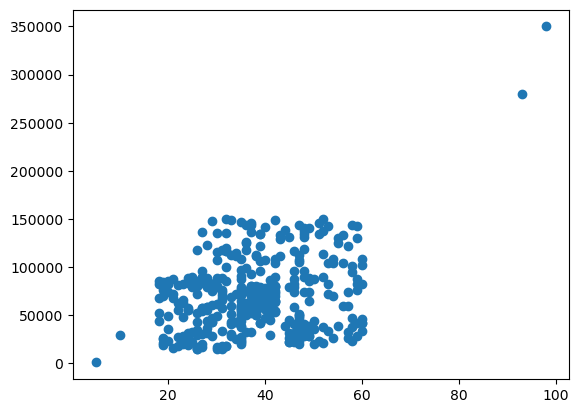

In [144]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [145]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
                                               df['Purchased'],test_size=0.25,random_state=23)


In [146]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [147]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [148]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled,columns=X_test.columns)

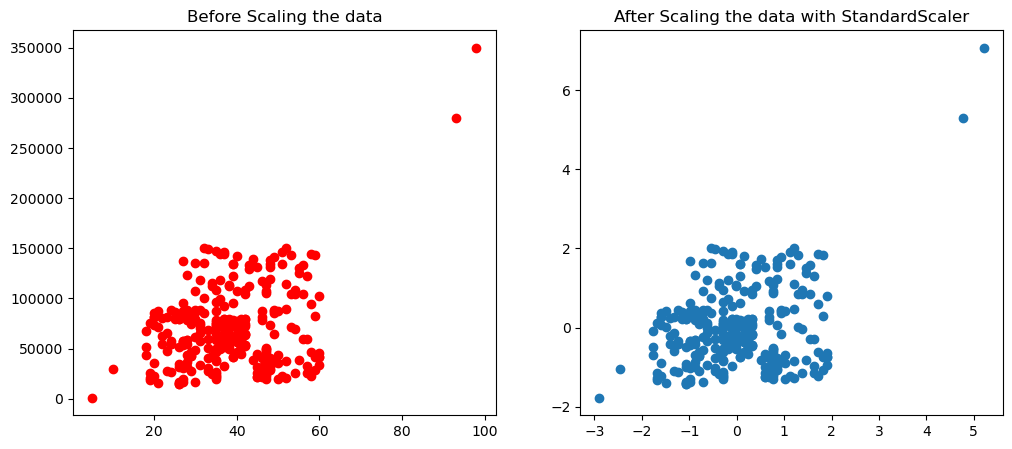

In [149]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'],color='red')
ax1.set_title('Before Scaling the data')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling the data with StandardScaler')

plt.show()


# Observation:
Outliers are not affected by the transformation